TRABAJO FINAL - CODERHOUSE - CALIDAD VINO

CRISTIAN PARELLO - COMISION 60935

Calidad Vino

En el competitivo mundo de la elaboración del vino, comprender y satisfacer las preferencias de los consumidores es fundamental para el éxito y crecimiento de una bodega. Para obtener información sobre la relación entre los consumidores y una marca de vino en particular, es esencial realizar encuestas que recopilen información valiosa sobre sus percepciones y opiniones.


Este estudio se centra en una encuesta a consumidores de vino para evaluar su nivel de satisfacción con la calidad de diferentes vinos. El conjunto de datos, obtenido de una fuente confiable, contiene más de 1000 respuestas que brindan información valiosa sobre las preferencias de los consumidores y las percepciones de las diversas características del vino.

Objetivo:

El objetivo principal de este estudio es identificar y abordar los factores que pueden afectar la satisfacción del consumidor con la calidad del vino, con el objetivo final de mejorar continuamente la calidad de nuestros vinos para satisfacer las expectativas de nuestra exigente clientela.




Introduccion Data Frame

In [98]:
#Importamos las librerias que utilizaremos para el proyecto

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

In [99]:
#Importamos el Dataset, en este caso Wine Quality obtenido en Kaggle

path = ('/content/sample_data/WineQT.csv')
df = pd.read_csv(path)
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Verificamos Valores Nulos en Nuestro DataSet

In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

No se observan valores nulos

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [31]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [32]:
# Describimos los valores del Data set
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


In [33]:
# Eliminamos la columna ID , ya que no la utilizaremos para el analisis

df.drop(columns="Id",inplace=True)


#ademas obtendremos los valires unicos de la columna Quality

print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


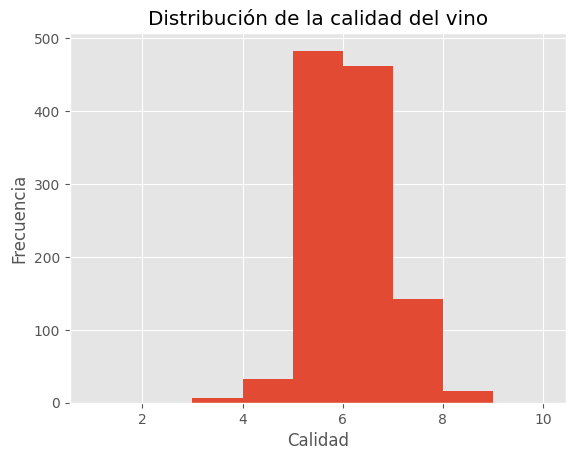

In [35]:
# Con el gráfico histograma podremos ver el centro y la extension de los datos
plt.hist(df['quality'], bins=range(1, 11))
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la calidad del vino')
plt.show()

In [26]:
# Realizamos un calculado Agrupado con la media

ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500



El análisis de agregación por grupos realizado aquí permite obtener una comprensión más profunda de cómo la calidad del vino se relaciona con otras variables del conjunto de datos. Al calcular la media de la calidad para cada grupo, podemos identificar patrones o tendencias que podrían ser útiles para predecir la calidad del vino en nuevos datos.

<Axes: xlabel='quality'>

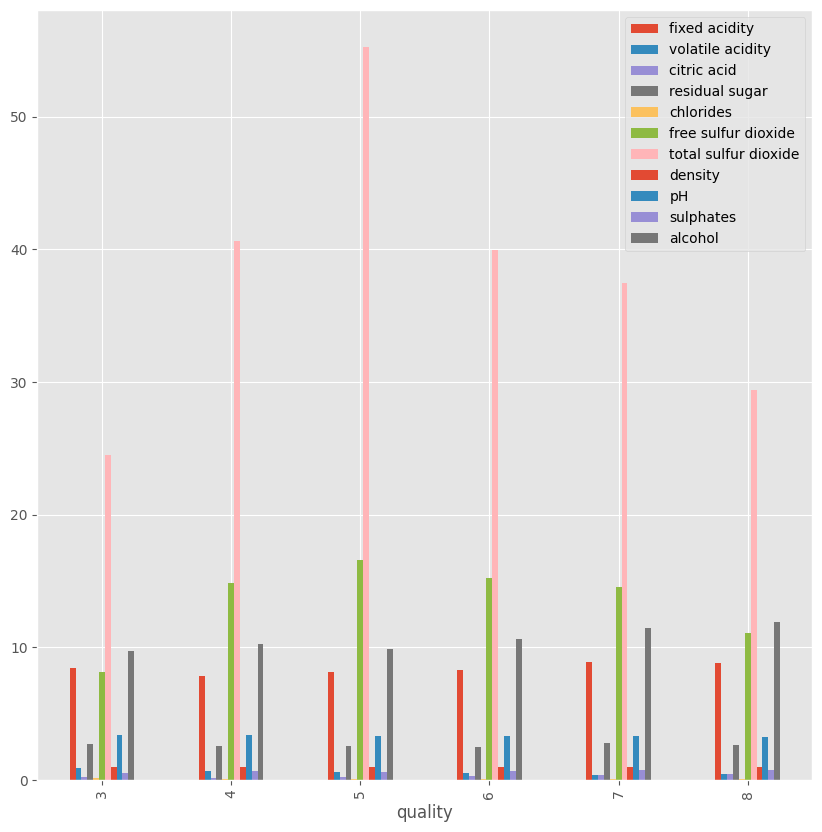

In [14]:
# Graficamos lo obtenido anteriormente para un mayor diagnostico.

ave_qu.plot(kind="bar",figsize=(10,10))

Una de las principales preguntas que el EDA nos ayudara a  responder es:

¿Cuales con los elementos de nuestro data set que tienen una mayor influencia en la calidad del vino?


<Axes: xlabel='quality', ylabel='alcohol'>

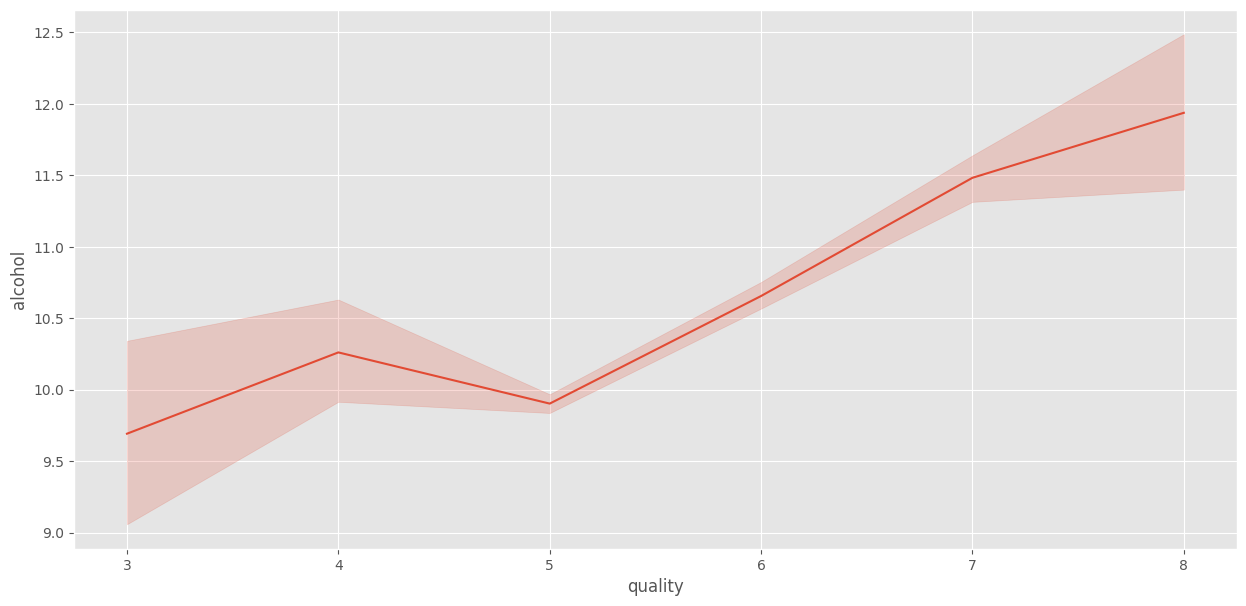

In [36]:
# Efecto del Alcohol en la Calidad

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

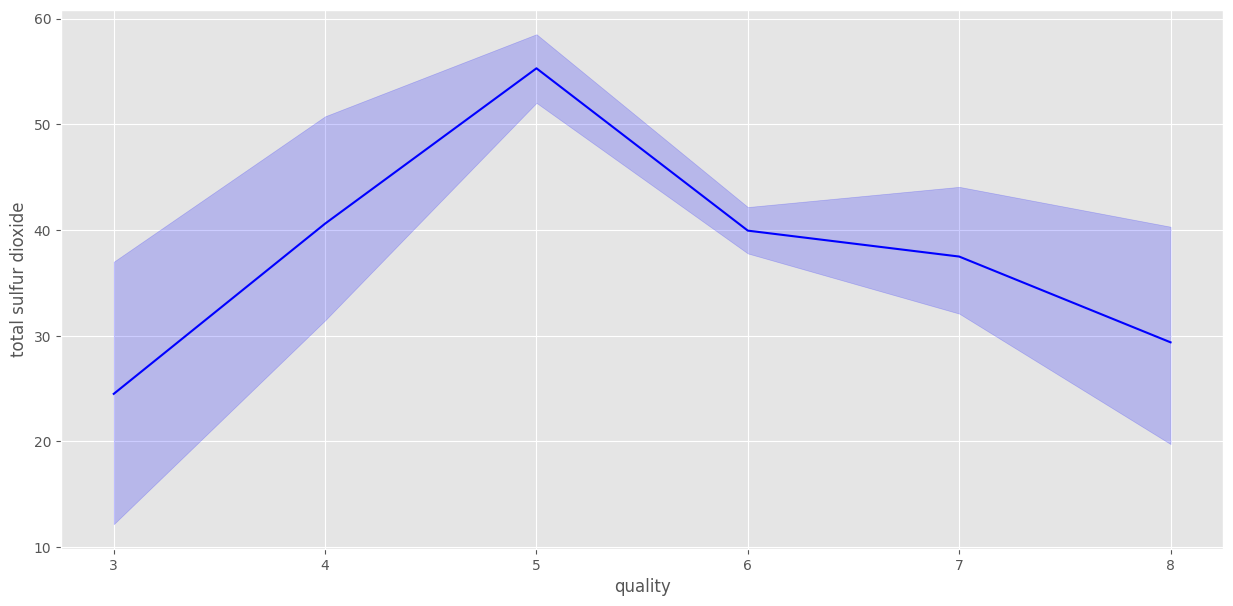

In [37]:
# Efectos del total sulfur dioxide en la calidad
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

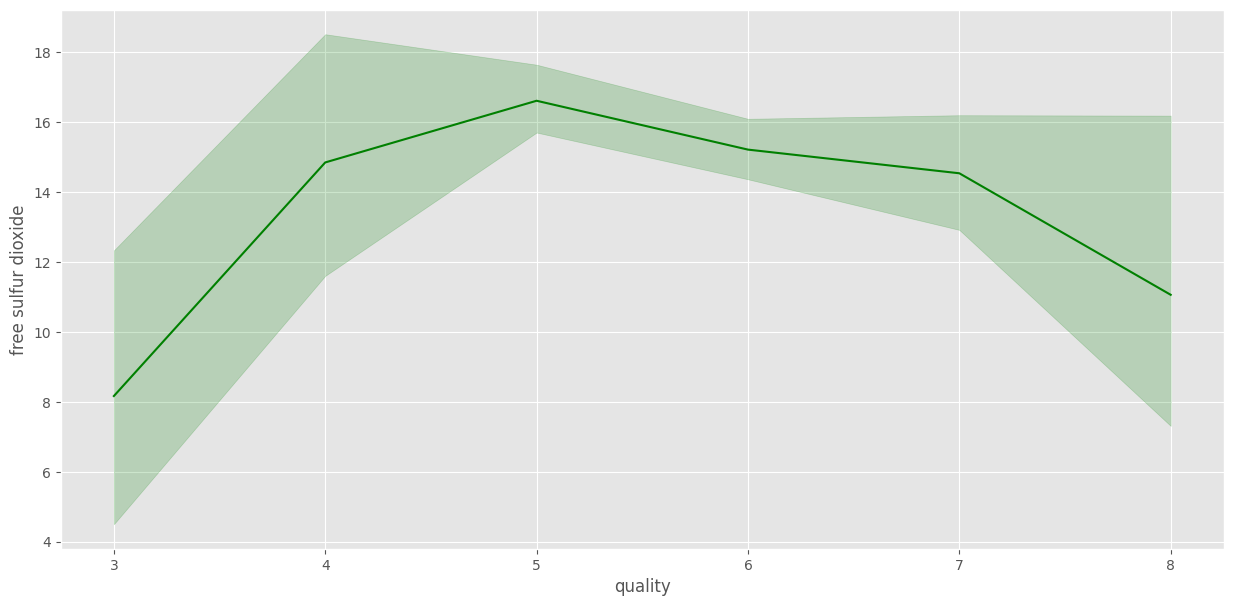

In [38]:
# Efectos del free sulfur dioxide en la calidad

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

## **Resultado de los Analisis**

Obtenemos 5 valores unicos en la calidad del vino (desde 3 hasta 8)


* La mayor calidad obtenida es  8.
* La menor calidad obtenida es 3.

Elementos con mayor influencia en la calidad del vino:

* Alcohol
* Free sulfur dioxide
* Total sulfur dioxide


### **2. Construcción de un modelo de aprendizaje automático**

Entrenaremos y aplicaremos 4 Modelos para ver cual nos otorga mejores resultados para predecir la calidad del vino



*   Logistic Regression
*   KNN
*   SVC
*   Random Forest



In [71]:
# Importamos la libreias para la creacion de los modelos


from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
from sklearn.svm import SVC ,SVR

In [49]:
#Separamos los valores para entrenar al modelo

X = df.drop(columns="quality")
y = df["quality"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Para mejorar el rendimiento, escalamos las caracteristicas del rendimiento

In [94]:
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_test)

# Logistic Regression

In [95]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = lr.score(x_test, y_test)
print("Training accuracy for Logistic Regression: ", lr.score(x_train, y_train)*100, "%")
print("Testing accuracy for Logistic Regression:", lr_acc*100, "%")

Training accuracy for Logistic Regression:  59.62499999999999 %
Testing accuracy for Logistic Regression: 65.88921282798835 %


# KNN

In [92]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = knn.score(x_test, y_test)
print("The training accuracy for KNN is:", knn.score(x_train, y_train)*100, "%")
print("The testing accuracy for KNN is:", knn_acc * 100, "%")

The training accuracy for KNN is: 68.375 %
The testing accuracy for KNN is: 59.475218658892125 %


# SVC

In [91]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = svc.score(x_test, y_test)
print("The training accuracy for SVC is:", svc.score(x_train, y_train)*100, "%")
print("The testing accuracy for SVC is:", svc_acc * 100, "%")

The training accuracy for SVC is: 65.375 %
The testing accuracy for SVC is: 65.01457725947522 %


# Random Forest

In [90]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_acc = rfc.score(x_test, y_test)
print("The training accuracy for Random Forest is:", rfc.score(x_train, y_train)*100, "%")
print("The testing accuracy for Random Forest is:", rfc_acc * 100, "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 69.38775510204081 %


Graficamos los resultados obtenidos con los diferentes modelos


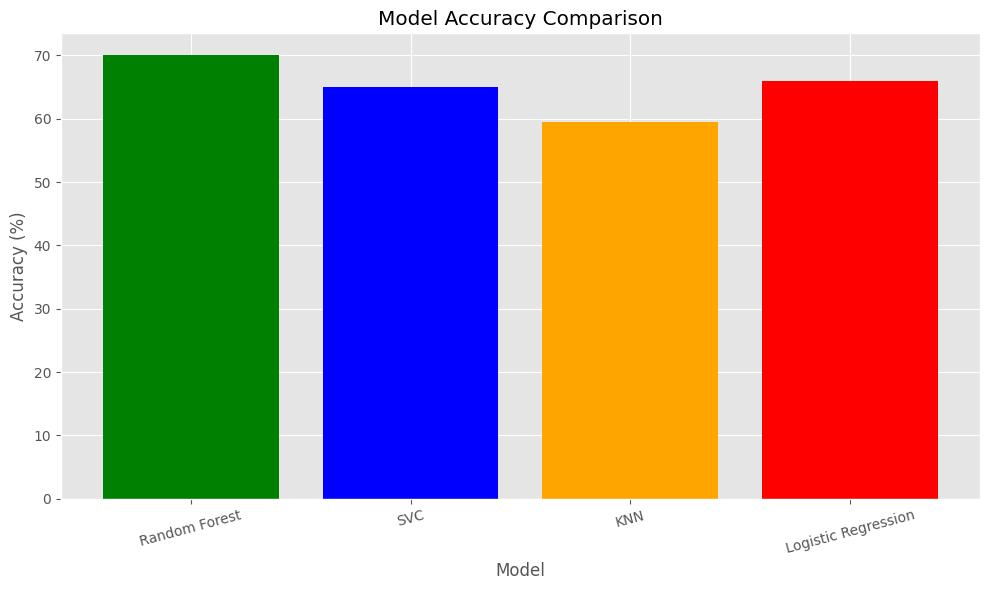

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 69.97084548104957 %
The training accuracy for SVC is: 65.375 %
The testing accuracy for SVC is: 65.01457725947522 %
The training accuracy for KNN is: 68.375 %
The testing accuracy for KNN is: 59.475218658892125 %
Training accuracy for Logistic Regression:  59.62499999999999 %
Testing accuracy for Logistic Regression: 6588.921282798835 %


In [96]:
# Define models
rfc = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()

# Train models
rfc.fit(x_train, y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)
lr.fit(x_train, y_train)

# Predict and calculate accuracy
rfc_pred = rfc.predict(x_test)
svc_pred = svc.predict(x_test)
knn_pred = knn.predict(x_test)
lr_pred = lr.predict(x_test)
rfc_acc = accuracy_score(y_test, rfc_pred) * 100
svc_acc = accuracy_score(y_test, svc_pred) * 100
knn_acc = accuracy_score(y_test, knn_pred) * 100
lr_acc = accuracy_score(y_test, lr_pred) * 100

# Prepare data for bar chart
models = ["Random Forest", "SVC", "KNN", "Logistic Regression"]
accuracy = [rfc_acc, svc_acc, knn_acc, lr_acc]

# Create bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(models, accuracy, color=['green', 'blue', 'orange', 'red'])  # Customize colors
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)  # Rotate x-axis labels slightly for readability with more models

# Display chart
plt.tight_layout()
plt.show()

# Print accuracy for reference (optional)
print("The training accuracy for Random Forest is:", rfc.score(x_train, y_train) * 100, "%")
print("The testing accuracy for Random Forest is:", rfc_acc, "%")
print("The training accuracy for SVC is:", svc.score(x_train, y_train) * 100, "%")
print("The testing accuracy for SVC is:", svc_acc, "%")
print("The training accuracy for KNN is:", knn.score(x_train, y_train) * 100, "%")
print("The testing accuracy for KNN is:", knn_acc, "%")
print("Training accuracy for Logistic Regression: ", lr.score(x_train, y_train)*100, "%")
print("Testing accuracy for Logistic Regression:", lr_acc*100, "%")

Conclusión

**Conclusión**

En este análisis, hemos implementado y evaluado varios modelos de clasificación para determinar la calidad del vino. Los modelos utilizados incluyen SVM (Support Vector Machine), KNN (K-Nearest Neighbors), Regresión Logística y Random Forest. Cada modelo fue entrenado y probado con los mismos datos, y se evaluaron sus precisiones para comparar su desempeño.

Como se observa en el gráfico el random Forest es el que se muestra mas robusto y confiable al momento de realizar la prediccion, teniendo en cuenta que los modelos fueron entrenados con los mismos datos.